# Estudo de Caso: Determinando Preços de Residências

## Por: Msc. Eng. Lucas Travi

## Curso: Machine Learning para Data Science - UFSM

## DESCRIÇÃO DO PROBLEMA
Este problema visa determinar os preços de residências usando regressão linear. O dataset é baseado em casas vendidas nesta região entre Janeiro de 2013 e Dezembro de 2015.

O dataset original pode ser acessado [`aqui`](https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv)

Este estudo de caso é baseado em um [`artigo`](https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878) brilhantemente escrito pela cientista de dados Susan Li no Medium.

In [1]:
import numpy as np
import pandas as pd
residencias = pd.read_csv('final_data.csv')
residencias.head()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [2]:
print("Quantidade de casas:",residencias.shape[0])
print("Quantidade de atributos inicial:",residencias.shape[1])

Quantidade de casas: 11330
Quantidade de atributos inicial: 19


Conforme é debatido no artigo, alguns desses atributos são necessários e podem ser descartados

In [3]:
residencias.drop(residencias.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
residencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


In [4]:
residencias.head(n=50)

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
0,Address: 1160 Mission Street #2007,2.00,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,"975,700"
1,Address: 260 King Street #475,1.00,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,"975,700"
2,Address: 560 Missouri Street #B,4.00,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,"1,277,600"
3,Address: 350 Missouri Street,3.00,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,"1,277,600"
4,Address: 3658 Folsom Street,3.00,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,"1,248,000"
5,Address: 156 Lowell Street,1.00,2.0,1250.0,02/17/2016,460000.0,37.710226,-122.446027,Crocker Amazon,5.0,SingleFamily,1924.0,"823,000"
6,Address: 735 Lakeview Avenue,1.00,3.0,1032.0,02/17/2016,532000.0,37.718024,-122.460332,Oceanview,6.0,SingleFamily,1939.0,"762,700"
7,Address: 430 Capistrano Avenue,1.00,2.0,1200.0,02/17/2016,1050000.0,37.725204,-122.439273,Mission Terrace,5.0,SingleFamily,1924.0,"992,600"
8,Address: 4135 23rd Street,3.50,4.0,2700.0,02/17/2016,3500000.0,37.752602,-122.435011,Noe Valley,9.0,SingleFamily,1912.0,"1,782,000"
9,Address: 440 Steiner Street,2.00,3.0,2016.0,02/17/2016,1500000.0,37.773237,-122.432302,Hayes Valley,7.0,Condominium,1890.0,"1,224,800"


In [5]:
print("Quantidade de casas:",residencias.shape[0])
print("Nova quantidade de atributos:",residencias.shape[1])

Quantidade de casas: 11330
Nova quantidade de atributos: 13


In [6]:
residencias['zindexvalue'] = residencias['zindexvalue'].str.replace(',', '')
residencias['zindexvalue'] = residencias['zindexvalue'].convert_objects(convert_numeric=True)

C:\Users\Travi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [7]:
residencias['zindexvalue'].head()

0     975700
1     975700
2    1277600
3    1277600
4    1248000
Name: zindexvalue, dtype: int64

In [8]:
print("Início do dataset:",residencias.lastsolddate.min())
print("Finaldo dataset:",residencias.lastsolddate.max())

Início do dataset: 01/02/2013
Finaldo dataset: 12/31/2015


In [9]:
residencias.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


## VISUALIZANDO DADOS

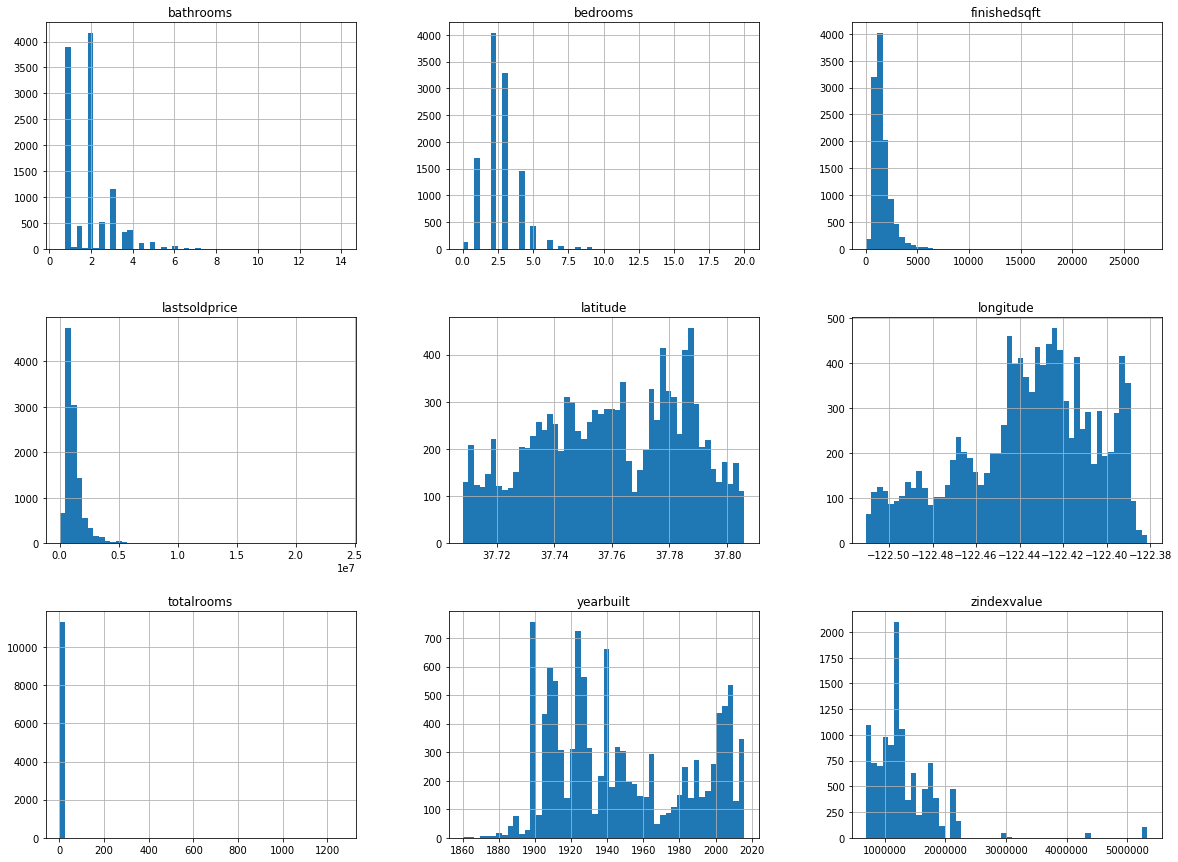

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
residencias.hist(bins=50, figsize=(20,15))
plt.show()

Vários atributos possuem histogramas que estão enviesados à direita, o que indica outliers de elevado valor

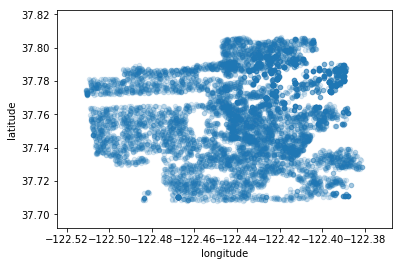

In [11]:
# Gerar um gráfico em função da latitude e longitude
residencias.plot(kind="scatter", x="longitude", y="latitude", alpha=0.15)

C:\Users\Travi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


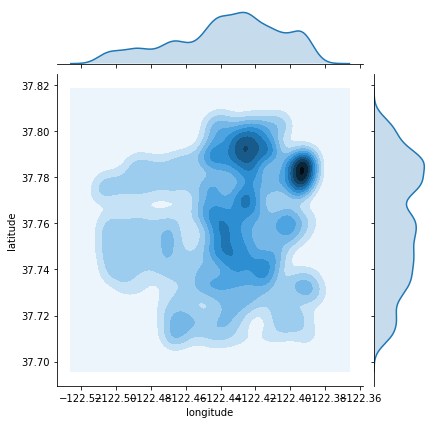

In [12]:
# Importar seaborn e plotar um gráfico que dimensione a densidade de casas vendidas em função da longitude e latitude
import seaborn as sns
sns.jointplot(x=residencias["longitude"], y=residencias["latitude"], kind='kde')

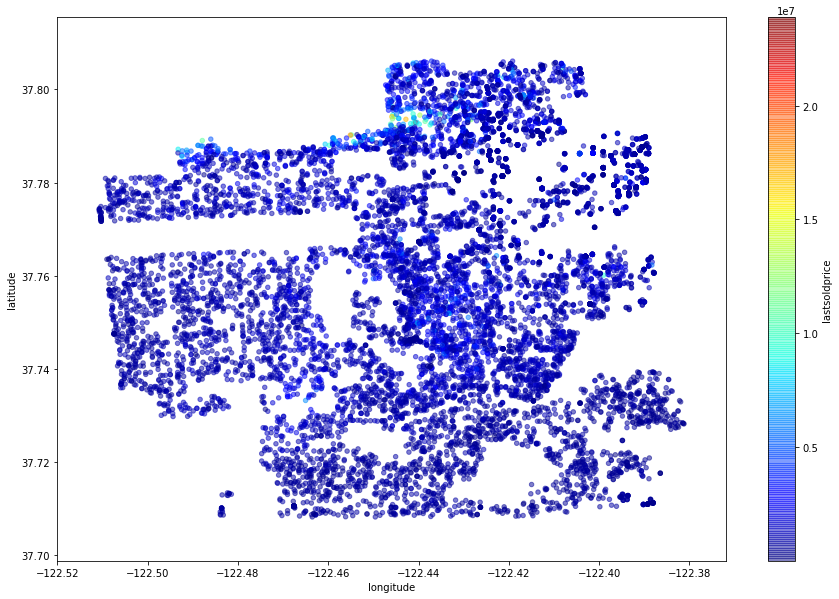

In [13]:
# Usar o atributo 'lastsoldprice' para diferenciar as residências por cor
residencias.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, figsize=(15,10),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

A partir deste gráfico podemos ter uma noção de onde as casas serão mais caras baseado na sua localização. Pode-se ver que a região que apresenta mais imóveis vendidos também apresenta as residências mais caras que foram vendidas.

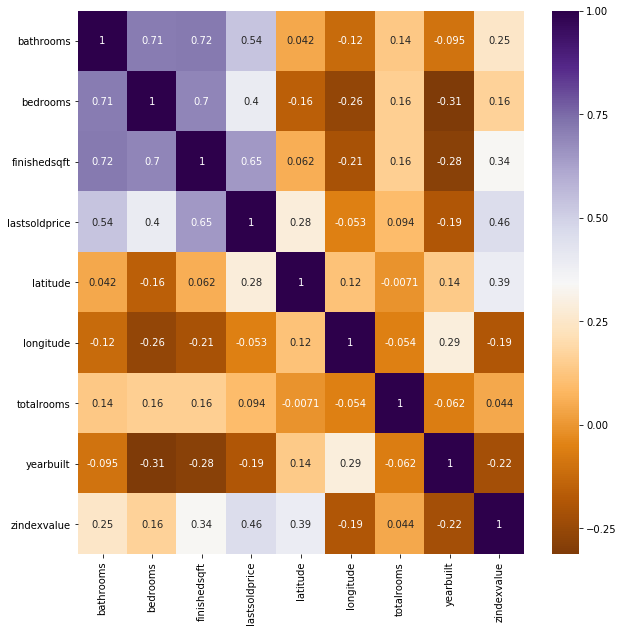

In [14]:
# Plotar uma matriz de correlação
corr_matrix=residencias.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='PuOr', annot=True, )

Pode-se ver uma elevada correlação entre o último preço de venda e o tamanho da propriedade. Além disso a quantidade de banheiros e quartos também podem fazer o preço da residência subir. O ano de construção pode apresentar uma correlação negativa.

C:\Users\Travi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


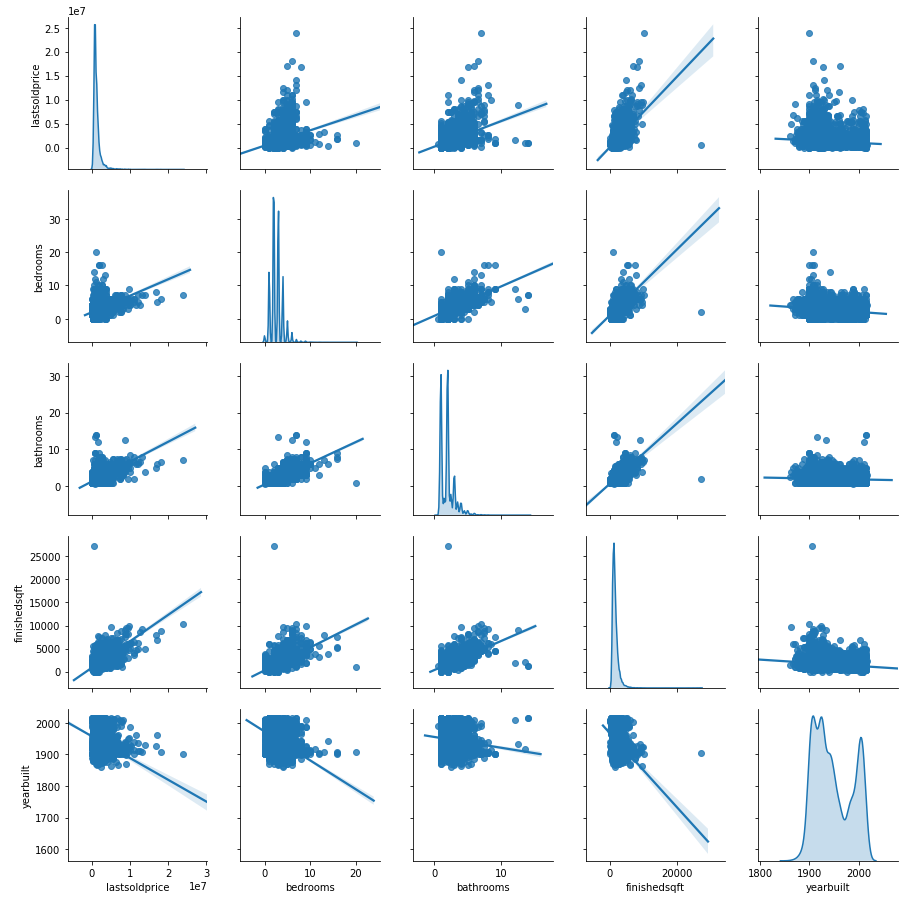

In [15]:
# Plotar um gráfico com todas as correlações entre os atributos e possível linearidade entre eles
sns.pairplot(residencias, diag_kind="kde", kind="reg", vars =['lastsoldprice', 'bedrooms', 'bathrooms', 'finishedsqft', 'yearbuilt'])
plt.show()

A partir do gráfico de correlograma acima podemos ver que casas mais antigas tendem a ser mais baratas. Este gráfico também demonstrou uma tendência de que residências mais antigas eram maiores e possuíam mais cômodos.

A relação mais forte no preço de venda em ambos os gráficos foi visto quando o relacionamos com o tamanho da residência, então, esta correlação será estudada de forma mais aprofundada

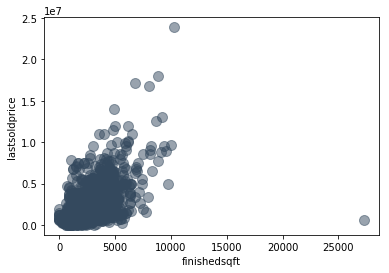

In [16]:
# Gráfico relacionando o preço de venda com o tamanho em pés quadrados
sns.regplot(x=residencias["finishedsqft"], y=residencias["lastsoldprice"], fit_reg=False, 
            scatter_kws={"color":"#34495e","alpha":0.5,"s":100} )

Não só podemos ver uma forte relação entre o preço de venda e o tamanho, como também é possível notar um outlier no canto direito inferior, se caracterizando por ser uma residência muito grande e muito barata. Como temos 11330 casas e apenas esse outlier, ele não influenciará no nosso modelo, logo, podemos mantê-lo.
O próximo passo será calcular o preço por m², para isto acrescentaremos a coluna "price_per_sqft" ao nosso dataset original e analisar se ele terá uma correlação relevante com o preço de venda do imóvel.

In [17]:
residencias['price_per_sqft'] = residencias['lastsoldprice']/residencias['finishedsqft']
residencias.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue,price_per_sqft
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06,1.760779e+03
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05,3.386125e+04
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05,4.672489e-01
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05,5.822858e+02
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06,7.819122e+02
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06,9.998414e+02
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06,1.930000e+06


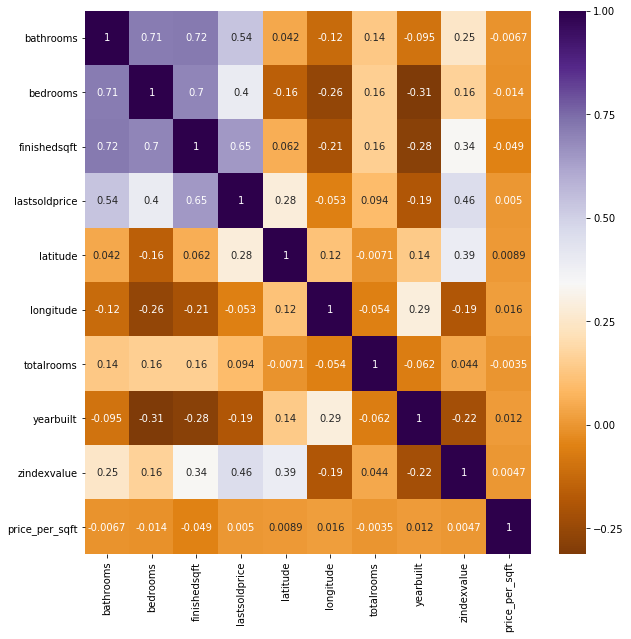

In [18]:
# Plotar uma matriz de correlação
corr_matrix=residencias.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='PuOr', annot=True, )

A localização (vizinhança) da residência não pareceu ser um atributo tão importante nessa região, talvez ao analisar uma cidade inteira seja necessário criar "clusters" para as vizinhanças, mas neste estudos seguiremos sem acrescentar esta variável. A variável que será adicionada será 'usecode', referente ao tipo de imóvel.

In [19]:
# Analisando quantos tipos de imóvel temos no dataset
len(residencias['usecode'].value_counts())

10

Temos 10 tipos de imóvel, será necessário codificá-los criando dummy variables.

## TREINANDO E AVALIANDO O MODELO

In [20]:
# Criar a matriz de variáveis independentes X
X = residencias[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt', 'zindexvalue']]
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000


In [21]:
# Criar a matriz com a variável dependente y
y = residencias['lastsoldprice']
y.head()

0    1300000.0
1     750000.0
2    1495000.0
3    2700000.0
4    1530000.0
Name: lastsoldprice, dtype: float64

In [22]:
# Obter as dummy variables para a coluna 'usecode'
dummy = pd.get_dummies(residencias.usecode)
dummy.head()

,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0


In [23]:
# Adicinar a matriz de dummy variables a X
X = pd.concat([X, dummy], axis=1)
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000,0,0,0,0,0,0,0,0,1,0


In [24]:
# Remover a coluna usecode
X.drop(['usecode'], inplace=True, axis=1)
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2.0,1043.0,4.0,2007.0,975700,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,2004.0,975700,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,2003.0,1277600,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,1927.0,1277600,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,4.0,1900.0,1248000,0,0,0,0,0,0,0,0,1,0


Agora que todos nossos dados são números, podemos implementar o modelo de regressão linear.

In [25]:
# Dividir a rede entre treino e teste
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

C:\Users\Travi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
# Criar o modelo de regressão linear
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# Calcular o erro quadrático da regressão linear
y_pred = regressor.predict(X_test)
print('R² da regressão linear": %.4f' % regressor.score(X_test, y_test))

R² da regressão linear": 0.5310


In [28]:
# Criar uma regressão linear com Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(X_train, y_train)

C:\Users\Travi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
# Calcular o erro quadrático da Random Forest
print('R² da Random Forest": %.4f' % forest_reg.score(X_test, y_test))

R² da Random Forest": 0.6137


In [30]:
# Criar uma regressão linear com Gradient Boosting
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [31]:
# Calcular erro quadrático do Gradient Boosting
print('R² do Gradient Boosting": %.4f' % model.score(X_test, y_test))

R² do Gradient Boosting": 0.6365


## ANALISANDO OS ATRIBUTOS
Vamos fazer alguns testes de como melhorar o modelo. Uma das forma pode ser usar menos variáveis independentes.

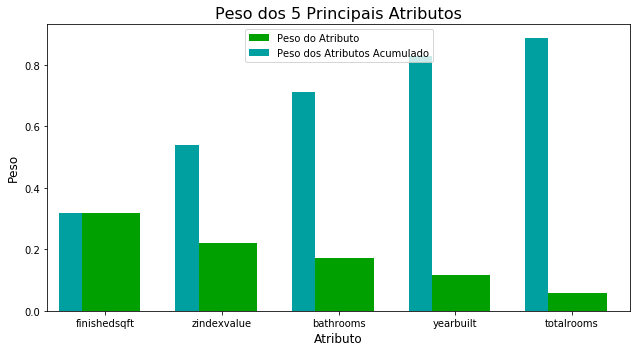

In [32]:
# Analisando os principais atributos
model = ensemble.GradientBoostingRegressor().fit(X_train, y_train)
importances = model.feature_importances_

# Demonstrar os 5 principais atributos
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:5]]
values = importances[indices][:5]

# Gerar um gráfico
fig = plt.figure(figsize = (9,5))
plt.title("Peso dos 5 Principais Atributos", fontsize = 16)
plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
       label = "Peso do Atributo")
plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
       label = "Peso dos Atributos Acumulado")
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Peso", fontsize = 12)
plt.xlabel("Atributo", fontsize = 12)
    
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.show()  

Os 5 principais atributos são responsáveis por mais de 80% do resultado final, que é o preço de venda do imóvel.
Fica evidente a importância já esperada do atributo referente ao tamanho da residência.

In [33]:
# Fazer um modelo de regressão linear apenas com os 5 principais atributos
X = residencias[['bathrooms', 'finishedsqft', 'totalrooms', 'yearbuilt', 'zindexvalue']]
X.head()

,bathrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue
0,2.0,1043.0,4.0,2007.0,975700
1,1.0,903.0,3.0,2004.0,975700
2,4.0,1425.0,6.0,2003.0,1277600
3,3.0,2231.0,10.0,1927.0,1277600
4,3.0,1300.0,4.0,1900.0,1248000


In [34]:
y = residencias['lastsoldprice']
y.head()

0    1300000.0
1     750000.0
2    1495000.0
3    2700000.0
4    1530000.0
Name: lastsoldprice, dtype: float64

In [35]:
# Dividir a rede entre treino e teste
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [36]:
# Criar uma regressão linear com Gradient Boosting
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [37]:
# Calcular erro quadrático do Gradient Boosting
print('Erro ao quadrado do Gradient Boosting": %.4f' % model.score(X_test, y_test))

Erro ao quadrado do Gradient Boosting": 0.6327


Com um dataset treinado com apenas 5 atributos de peso relevante conseguimos obter praticamente a mesma precisão do que para um dataset treinado com 26 atributos.
Para melhorar a precisão do modelo podem ser testados outros tipos de regressão, como redes neurais, por exemplo, utilizar mais ou menos atributos no treinamento do modelo, ou até mesmo procurar otimizar os parâmetros de treino do regressor.